In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import urllib

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"c22fcf727f5de65b6368e153ddbbef6d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.0MB/s]


In [ ]:
!unzip '/content/new-york-city-airbnb-open-data.zip' -d '/content/'

Archive:  /content/new-york-city-airbnb-open-data.zip
  inflating: /content/AB_NYC_2019.csv  
  inflating: /content/New_York_City_.png  


In [ ]:
data = pd.read_csv('/content/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Cleaning**

In [ ]:
len(data)

48895

In [ ]:
data = data[data['price']>0]
len(data)

48884

# **Learn From Area**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


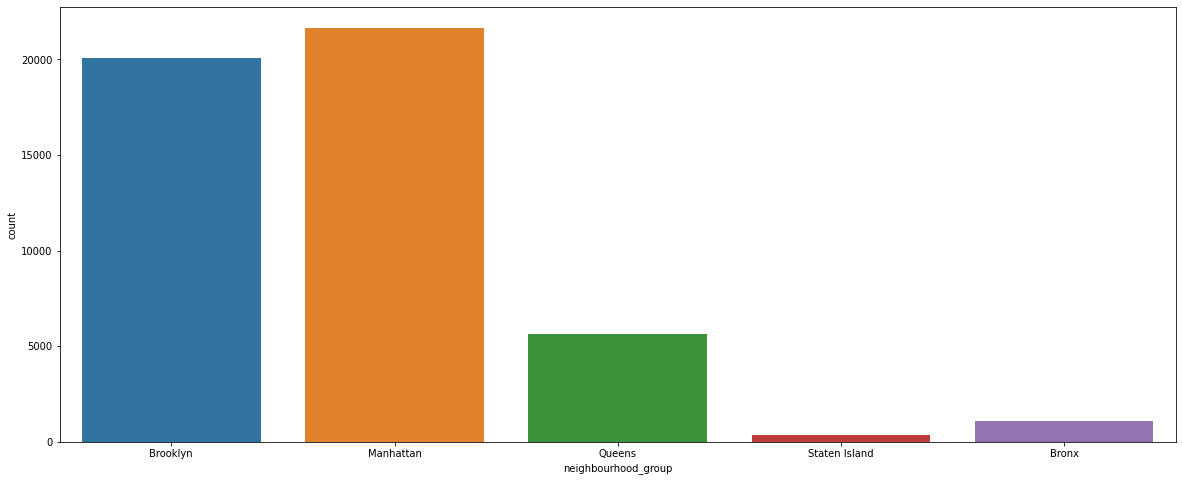

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(data['neighbourhood_group'])

## **Price**

**Disturbiution of prices in diffrent neighbourhood_group**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

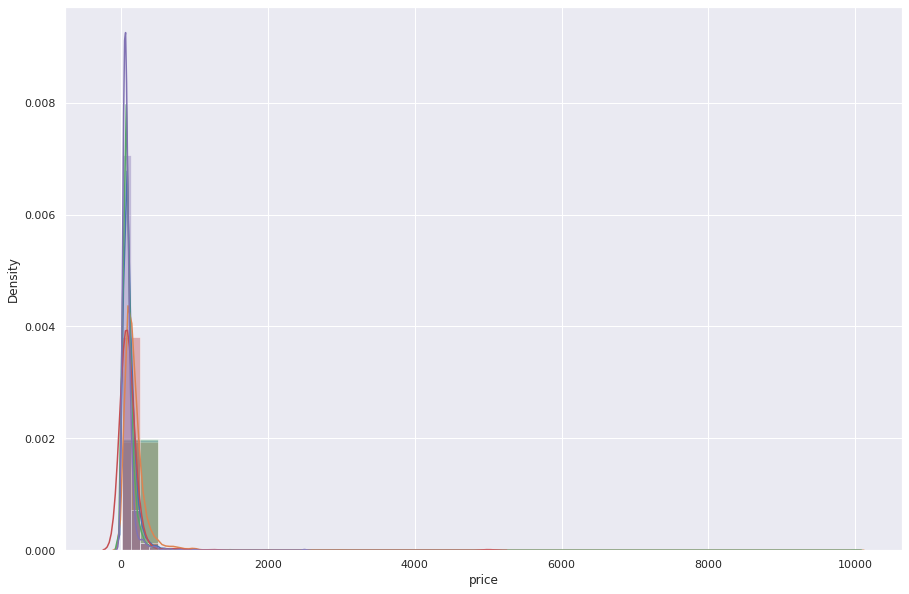

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.price[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

### **All neighbourhoods**

In [ ]:
from scipy.stats import f_oneway
f_oneway(*[data.price[data.neighbourhood_group == i]
for i in data.neighbourhood_group.unique()])

F_onewayResult(statistic=354.62288762045216, pvalue=1.5933433480884124e-301)

In [ ]:
data[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                          ...                       
                       count        mean         std  ...    50%    75%      max
neighbourhood_group                                   ...                       
Bronx                 1090.0   87.577064  106.725371  ...   65.0   99.0   2500.0
Brooklyn             20095.0  124.438915  186.896837  ...   90.0  150.0  10000.0
Manhattan            21660.0  196.884903  291.386838  ...  150.0  220.0  10000.0
Queens                5666.0   99.517649  167.102155  ...   75.0  110.0  10000.0
Staten Island          373.0  114.812332  277.620403  ...   75.0  110.0   5000.0

[5 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


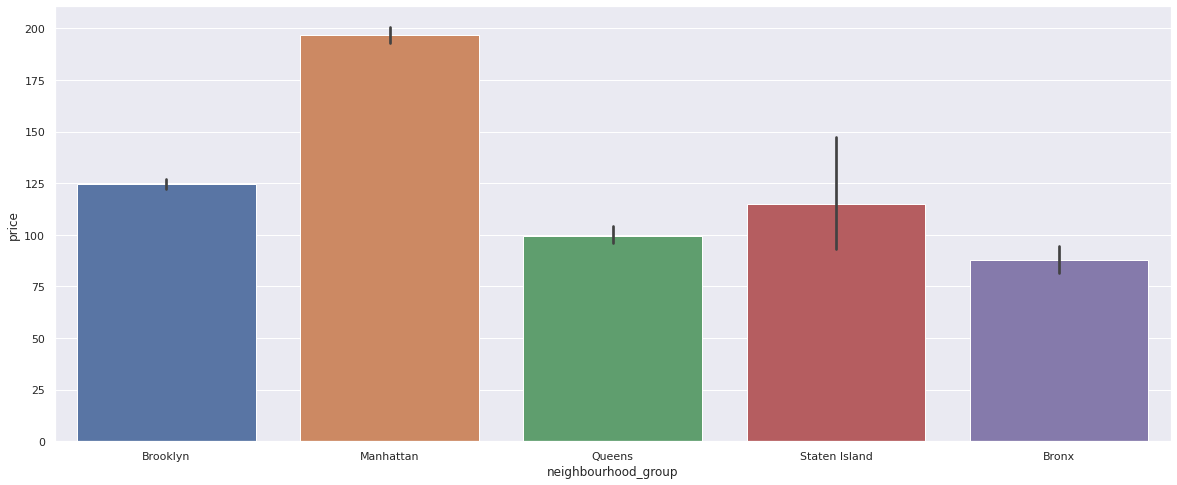

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('neighbourhood_group' ,'price' , data = data)

### **staten island & Brooklyn**

In [ ]:
temp = data.neighbourhood_group == "Staten Island"
temp2 = data.neighbourhood_group == "Brooklyn"
price1 = data[temp2]["price"].values
price2 = data[temp2]["price"].values[1200:1573]

In [ ]:
stats.ttest_ind(price2,price1)

Ttest_indResult(statistic=0.7278279988726072, pvalue=0.4667272092045224)

## **Number Of Reviews**

### **All neighbourhoods**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

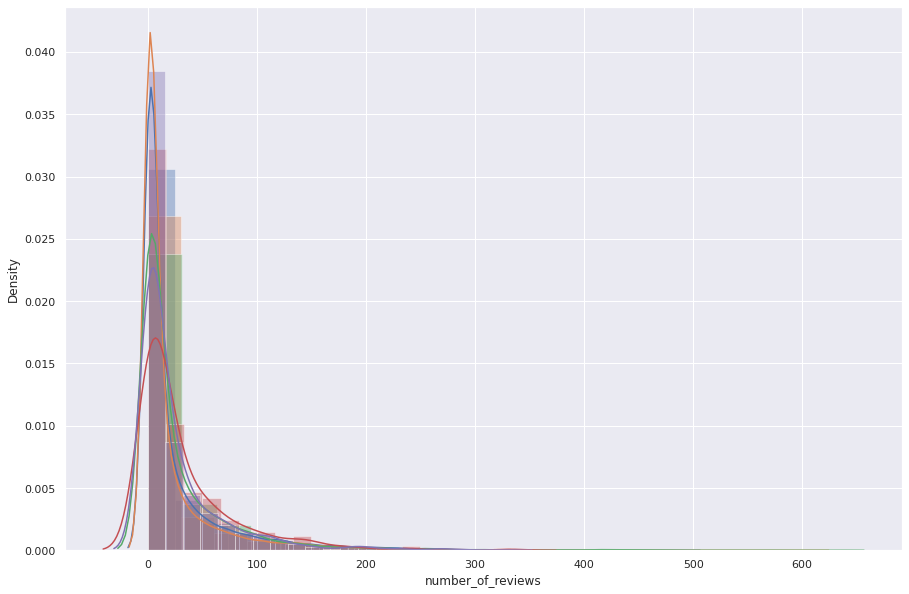

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.number_of_reviews[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

In [ ]:
from scipy.stats import f_oneway
f_oneway(*[data.number_of_reviews[data.neighbourhood_group == i]
for i in data.neighbourhood_group.unique()])

F_onewayResult(statistic=34.27528757057594, pvalue=1.2931235705389406e-28)

In [ ]:
data[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                        ...                   
                                count       mean        std  ...   50%   75%    max
neighbourhood_group                                          ...                   
Bronx                          1090.0  25.977982  42.225003  ...   9.0  32.0  321.0
Brooklyn                      20095.0  24.197661  44.345359  ...   6.0  25.0  488.0
Manhattan                     21660.0  20.986565  42.573021  ...   4.0  19.0  607.0
Queens                         5666.0  27.700318  51.955853  ...   7.0  32.0  629.0
Staten Island                   373.0  30.941019  44.830766  ...  12.0  42.0  333.0

[5 rows x 8 columns]

**Samples from each group**

In [ ]:
temp1 = data.neighbourhood_group == "Staten Island"
temp = data[temp1]
staten = temp.sample(n=300)

temp2 = data.neighbourhood_group == "Manhattan"
temp = data[temp2]
manhattan = temp.sample(n=300)

temp3 = data.neighbourhood_group == "Brooklyn"
temp = data[temp3]
brooklyn = temp.sample(n=300)

temp4 = data.neighbourhood_group == "Queens"
temp = data[temp4]
queens = temp.sample(n=300)

temp5 = data.neighbourhood_group == "Bronx"
temp = data[temp5]
bronx = temp.sample(n=300)

samp = pd.concat([staten, manhattan, brooklyn, queens, bronx])

f_oneway(*[samp.number_of_reviews[samp.neighbourhood_group == i]
for i in samp.neighbourhood_group.unique()])

F_onewayResult(statistic=1.6398825955728273, pvalue=0.16169455848239866)

In [ ]:
samp[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                        ...                    
                                count       mean        std  ...   50%    75%    max
neighbourhood_group                                          ...                    
Bronx                           300.0  25.890000  41.143739  ...   9.0  32.25  321.0
Brooklyn                        300.0  25.796667  47.904678  ...   6.0  24.00  334.0
Manhattan                       300.0  21.270000  48.166418  ...   4.0  19.25  540.0
Queens                          300.0  24.783333  59.155509  ...   4.0  25.00  576.0
Staten Island                   300.0  31.273333  44.432866  ...  12.5  43.50  333.0

[5 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


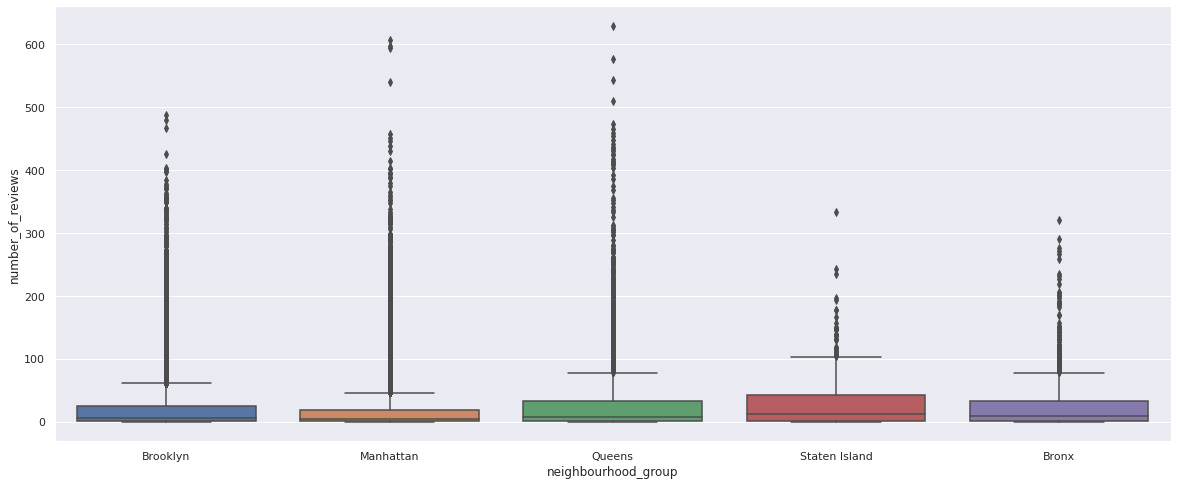

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood_group' ,'number_of_reviews' , data = data)

### **Staten Island**

In [ ]:
stats.ttest_ind(staten.price,data.sample(373).price)

Ttest_indResult(statistic=-4.088514008146278, pvalue=4.8679484828335125e-05)

### **Zero Reviews**

In [ ]:
temp = data.number_of_reviews == 0
data_zero = data[temp]
data_zero

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


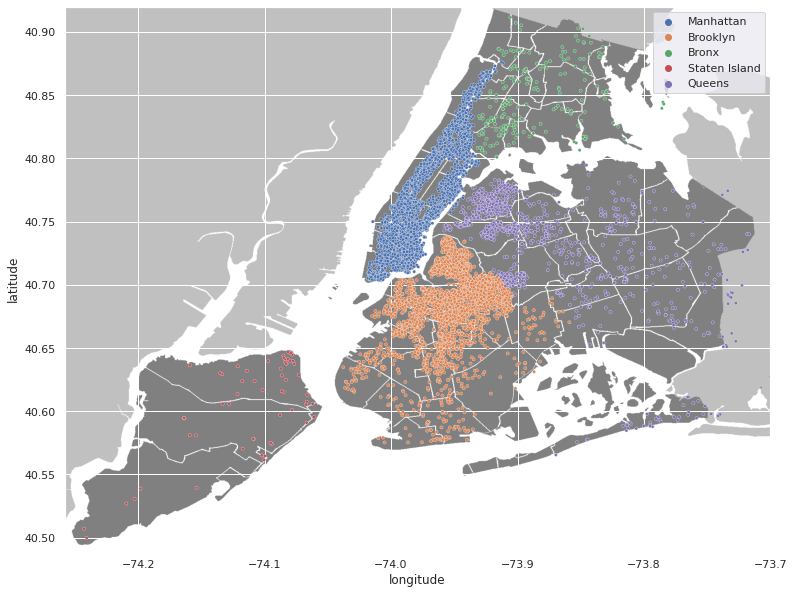

In [ ]:
plt.figure(figsize=(20,10))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_zero['longitude'], y=data_zero['latitude'], hue='neighbourhood_group',s=10, data=data_zero)
plt.legend()
plt.show()

### **High Reviews**

In [ ]:
temp = data.number_of_reviews > 300
data_high = data[temp]
data_high

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
53,14314,Greenpoint Place...Has It All!,56246,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,2,328,2019-06-29,2.82,1,234
67,16580,"Sunny, Modern room in East Village!",64442,Reka,Manhattan,East Village,40.72649,-73.97904,Private room,80,1,338,2019-07-01,4.72,2,72
104,24143,"Williamsburg—Steps To Subway, Private Bath&Bal...",97219,Seth,Brooklyn,Williamsburg,40.71332,-73.94177,Private room,101,3,335,2019-05-29,3.02,1,152
110,26362,"Times Square, Safe, Clean and Cozy!",59734,Luiz,Manhattan,Hell's Kitchen,40.75527,-73.99291,Private room,59,2,334,2019-06-16,3.00,2,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
25249,20196339,Private Guest Suite Less than 10 min to JFK :),7097558,Louise,Queens,South Ozone Park,40.66941,-73.79148,Entire home/apt,50,1,310,2019-07-06,13.27,2,23
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25


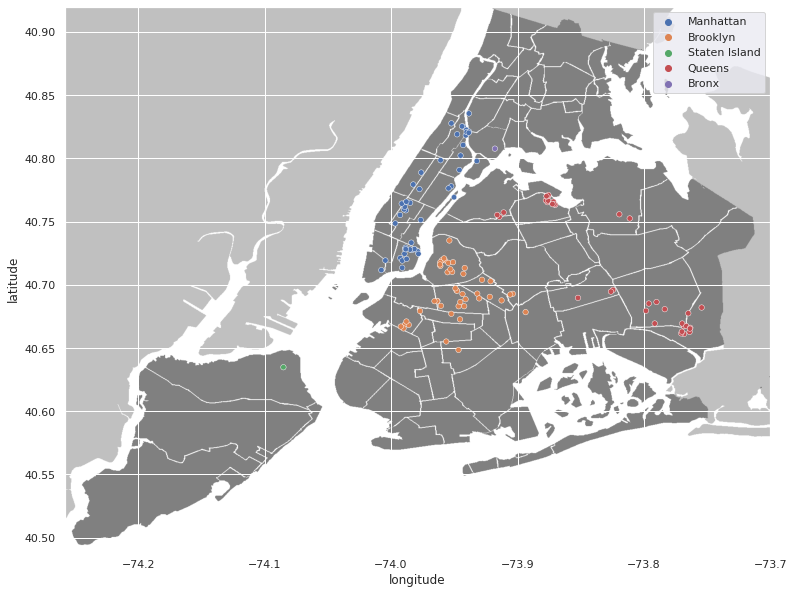

In [ ]:
plt.figure(figsize=(20,10))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_high['longitude'], y=data_high['latitude'], hue='neighbourhood_group',s=30, data=data_high)
plt.legend()
plt.show()

In [ ]:
data_high[["neighbourhood",'number_of_reviews']].groupby("neighbourhood").describe()

number_of_reviews              ...               
                                      count        mean  ...     75%    max
neighbourhood                                            ...               
Astoria                                 3.0  386.333333  ...  427.50  441.0
Bedford-Stuyvesant                     10.0  343.000000  ...  355.50  397.0
Bushwick                                6.0  356.666667  ...  354.00  480.0
Chelsea                                 1.0  375.000000  ...  375.00  375.0
Chinatown                               1.0  318.000000  ...  318.00  318.0
Civic Center                            1.0  319.000000  ...  319.00  319.0
Clinton Hill                            4.0  360.750000  ...  378.75  426.0
Crown Heights                           2.0  334.500000  ...  341.75  349.0
Cypress Hills                           1.0  319.000000  ...  319.00  319.0
East Elmhurst                          14.0  425.214286  ...  456.25  543.0
East Flatbush                           1.0  356.000000  ...  356.00  356.0
East Harlem                             3.0  321.000000  ...  324.00  325.0
East Village                            9.0  384.777778  ...  403.00  451.0
Flushing                                2.0  393.500000  ...  433.75  474.0
Gowanus                                 1.0  378.000000  ...  378.00  378.0
Gramercy                                1.0  323.000000  ...  323.00  323.0
Greenpoint                              1.0  328.000000  ...  328.00  328.0
Harlem                                 10.0  439.700000  ...  560.00  607.0
Hell's Kitchen                          7.0  352.714286  ...  379.50  430.0
Jamaica                                 7.0  440.857143  ...  515.00  629.0
Lower East Side                         3.0  407.333333  ...  450.00  540.0
Mott Haven                              1.0  321.000000  ...  321.00  321.0
Murray Hill                             1.0  321.000000  ...  321.00  321.0
Park Slope                              2.0  405.500000  ...  446.75  488.0
Prospect-Lefferts Gardens               1.0  401.000000  ...  401.00  401.0
Richmond Hill                           2.0  416.000000  ...  420.00  424.0
South Ozone Park                        1.0  310.000000  ...  310.00  310.0
South Slope                             3.0  406.333333  ...  432.50  467.0
Springfield Gardens                     8.0  356.625000  ...  382.00  434.0
Theater District                        1.0  330.000000  ...  330.00  330.0
Tompkinsville                           1.0  333.000000  ...  333.00  333.0
Tribeca                                 1.0  447.000000  ...  447.00  447.0
Upper East Side                         3.0  350.000000  ...  368.00  389.0
Upper West Side                         4.0  349.750000  ...  365.00  401.0
Washington Heights                      1.0  307.000000  ...  307.00  307.0
Williamsburg                           13.0  348.846154  ...  372.00  404.0
Woodhaven                               1.0  386.000000  ...  386.00  386.0

[37 rows x 8 columns]

In [ ]:
temp = data.neighbourhood == "East Elmhurst"
data_E = data[temp]
data_E

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1162,495249,10min Walk & 15mins to Tourist Spot,2446219,Biren,Queens,East Elmhurst,40.75541,-73.89239,Private room,85,1,219,2019-06-14,2.63,2,305
1519,689329,Cozy 15 mins Manhattan& 10 Mins LGA,2446219,Biren,Queens,East Elmhurst,40.75772,-73.89530,Private room,62,1,296,2019-06-29,3.92,2,234
2120,973535,"Garden Apt, 5 mins from LaGuardia",3179866,Gonzalo And Nora,Queens,East Elmhurst,40.76356,-73.88850,Entire home/apt,99,3,158,2019-07-02,2.08,2,322
5314,3836199,"2 bedroom with yard, 4 mins to LGA",19758179,Telmo,Queens,East Elmhurst,40.76287,-73.88367,Entire home/apt,120,3,102,2019-06-04,1.73,1,300
6226,4550041,Bright! LARGE 2 BEDS near Manhattan,23591164,Angela,Queens,East Elmhurst,40.76539,-73.87636,Private room,65,1,356,2019-06-23,6.31,4,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48034,36041377,Newly Renovated 1 BD w/ AC & Netflix in Queens...,268784513,Amit,Queens,East Elmhurst,40.75755,-73.88199,Private room,50,1,3,2019-07-05,3.00,3,359
48249,36151482,Luxury apartment in the “heart of queens”,271916367,Celina,Queens,East Elmhurst,40.75899,-73.85605,Private room,65,2,0,NaN,NaN,1,176
48267,36170749,Luxury 1 BD Full Bed w/ AC & Netflix in Queens...,268784513,Amit,Queens,East Elmhurst,40.75815,-73.88323,Private room,55,1,2,2019-07-06,2.00,3,358
48347,36207836,Big Room close to LGA Airport. Cuarto Grande.,157053317,Jey,Queens,East Elmhurst,40.76263,-73.88999,Private room,40,1,0,NaN,NaN,1,318


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


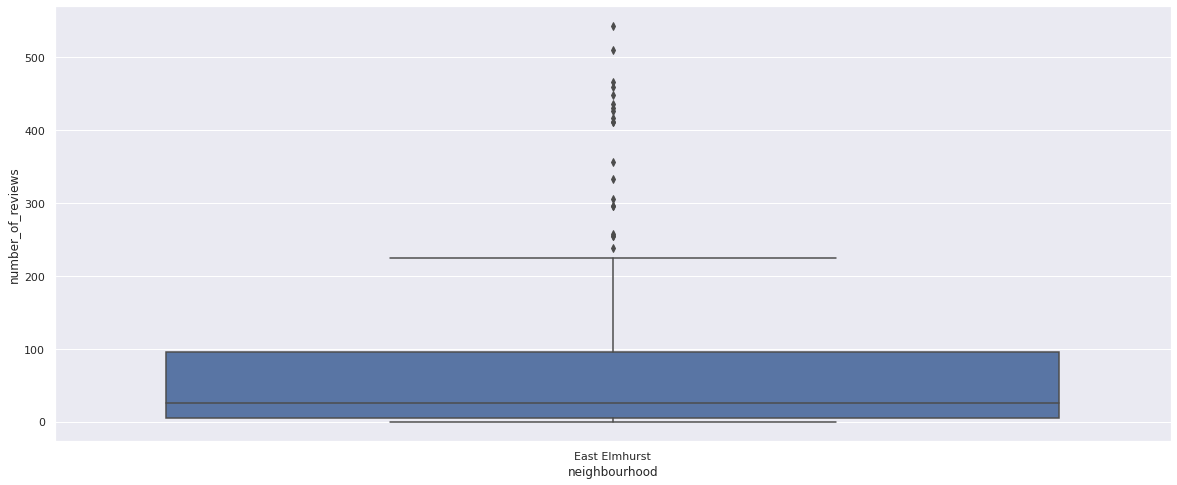

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'number_of_reviews' , data = data_E)

In [ ]:
stats.ttest_ind(data_E.number_of_reviews,data.sample(185).number_of_reviews)

Ttest_indResult(statistic=6.166470077350625, pvalue=1.8385613962884157e-09)

# **Log Transform**

In [ ]:
data['price_log']=np.log(data['price'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,4.248495
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,3.688879
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,4.744932
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,4.007333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


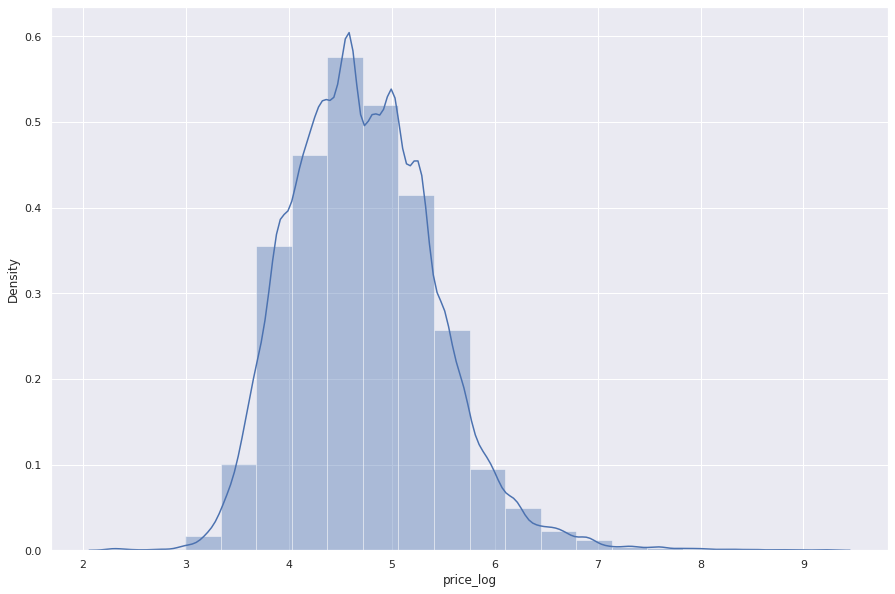

In [ ]:
sns.distplot(data.price_log,kde_kws={"label": groups}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

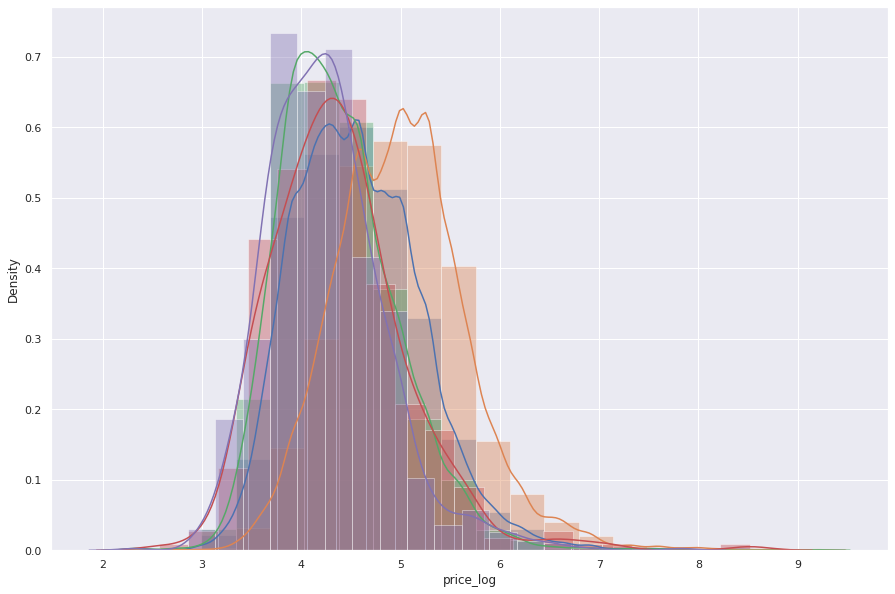

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.price_log[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

# **Busyiest**

### **First Things**

In [ ]:
data_busy = data.copy()
data_busy['available'] = 1
data_busy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.010635,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,4.248495,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,3.688879,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,4.744932,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,4.007333,1


In [ ]:
for i in range(len(data_busy)):
    if data_busy.iloc[i, data_busy.columns.get_loc('availability_365')] == 0:
        data_busy.iloc[i, data_busy.columns.get_loc('available')] = 0
data_busy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.010635,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,4.248495,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,3.688879,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,4.744932,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,4.007333,1


In [ ]:
temp = data_busy.availability_365 == 0
data_busyiest = data_busy[temp]
data_busyiest

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,4.094345,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,4.369448,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0,4.787492,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0,5.700444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0,3.806662,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0,4.709530,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0,4.859812,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0,3.828641,0


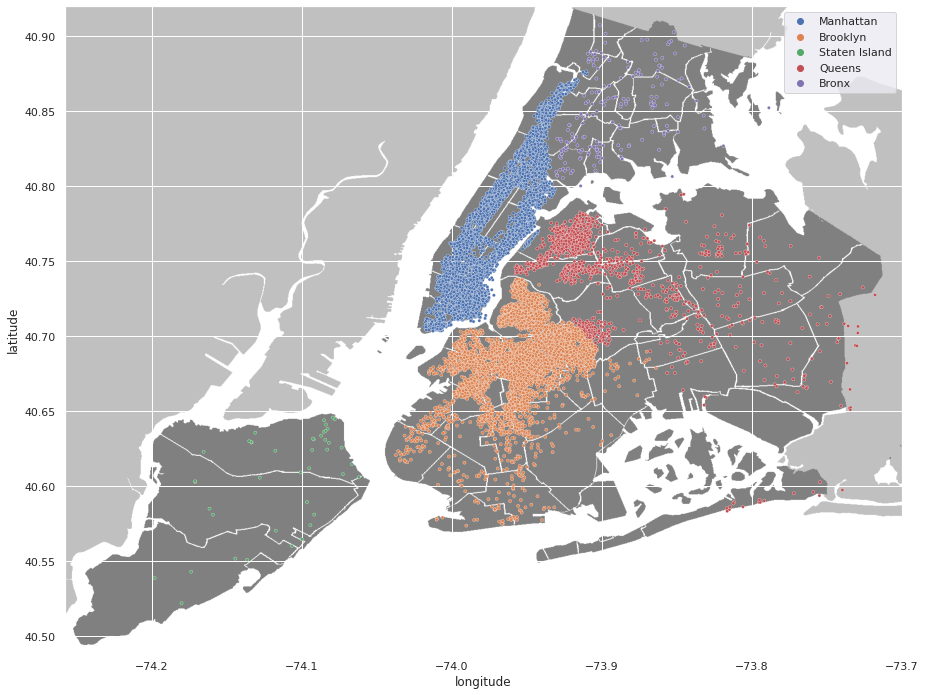

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_busyiest['longitude'], y=data_busyiest['latitude'], hue='neighbourhood_group',s=10, data=data_busyiest)
plt.legend()
plt.show()

### **Price & log_price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


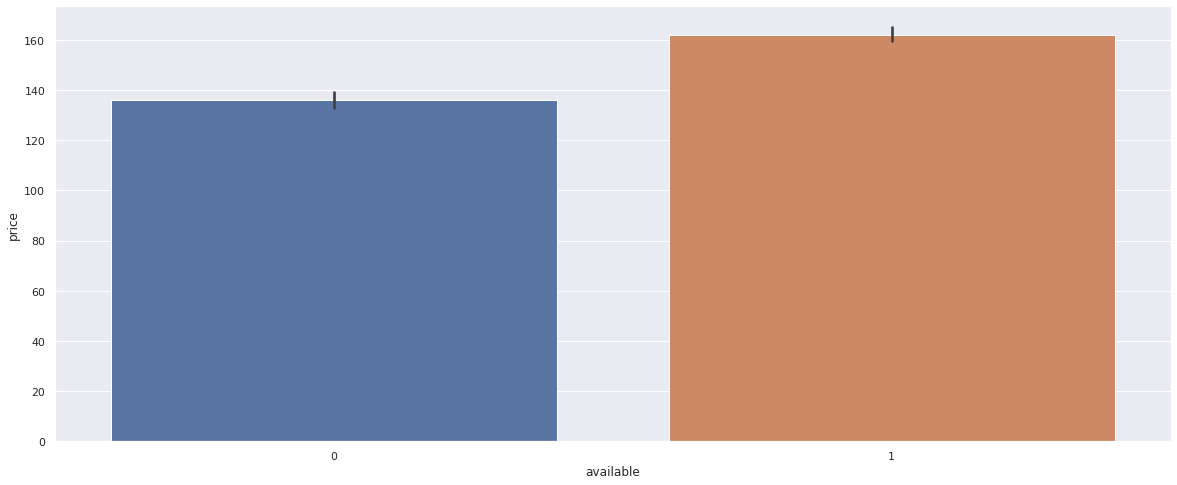

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'price' , data = data_busy)

In [ ]:
stats.ttest_ind(data_busyiest.sample(1000).price,data.sample(1000).price)

Ttest_indResult(statistic=0.7270372068069665, pvalue=0.46728833754550536)

In [ ]:
stats.wilcoxon(data_busyiest.sample(1000).price,data.sample(1000).price)

WilcoxonResult(statistic=234479.5, pvalue=0.8228921685689634)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


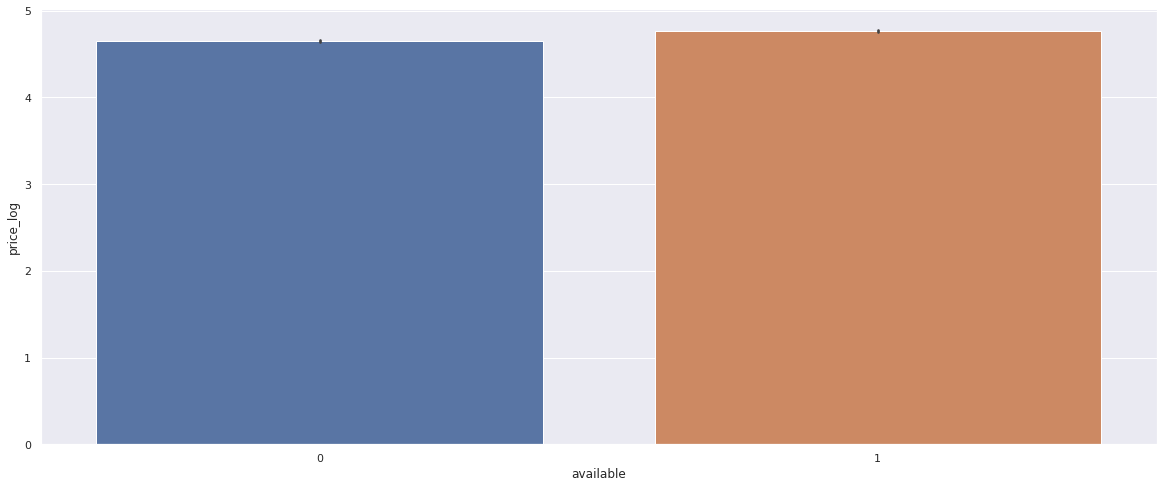

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'price_log' , data = data_busy)

### **Some discovery**

In [ ]:
data_busyiest[['price','number_of_reviews','minimum_nights','calculated_host_listings_count']].describe()

,price,number_of_reviews,minimum_nights,calculated_host_listings_count
count,17530.000000,17530.000000,17530.000000,17530.000000
mean,136.055391,7.930576,4.689447,1.437536
std,211.238670,19.965391,12.179115,3.793008
min,10.000000,0.000000,1.000000,1.000000
25%,65.000000,0.000000,1.000000,1.000000
50%,100.000000,2.000000,2.000000,1.000000
75%,158.000000,7.000000,4.000000,1.000000
max,10000.000000,480.000000,365.000000,103.000000


In [ ]:
data[['price','number_of_reviews','minimum_nights','calculated_host_listings_count']].describe()

,price,number_of_reviews,minimum_nights,calculated_host_listings_count
count,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,23.271991,7.029887,7.144628
std,240.170260,44.551331,20.512224,32.956185
min,10.000000,0.000000,1.000000,1.000000
25%,69.000000,1.000000,1.000000,1.000000
50%,106.000000,5.000000,3.000000,1.000000
75%,175.000000,24.000000,5.000000,2.000000
max,10000.000000,629.000000,1250.000000,327.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


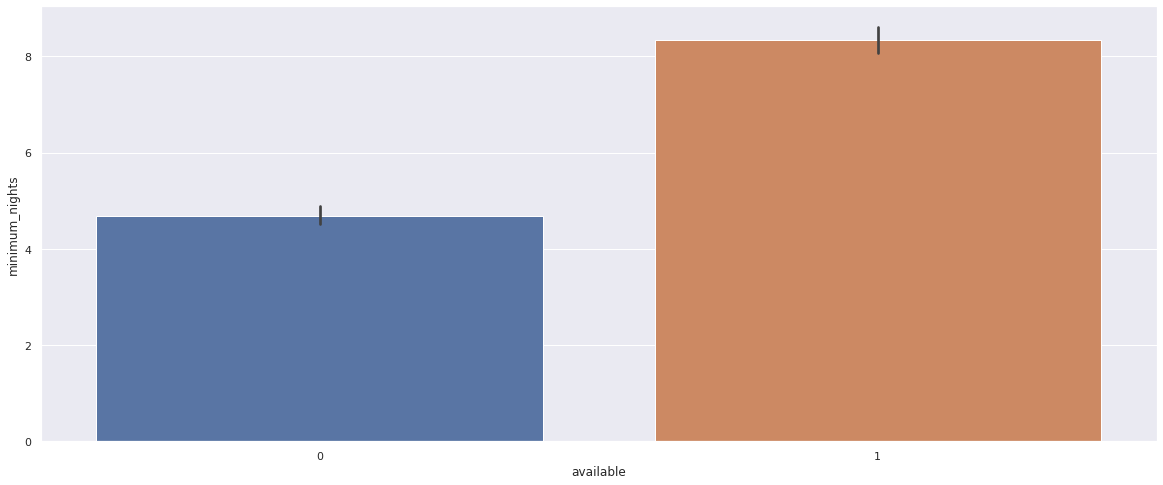

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'minimum_nights' , data = data_busy)

In [ ]:
stats.ttest_ind(data_busyiest.sample(500).minimum_nights,data.sample(500).minimum_nights)

Ttest_indResult(statistic=-2.068949907703411, pvalue=0.038807798305313175)

In [ ]:
stats.wilcoxon(data_busyiest.sample(500).minimum_nights,data.sample(500).minimum_nights)

WilcoxonResult(statistic=36327.0, pvalue=0.028192201556533448)

In [ ]:
stats.ttest_ind(data_busyiest.sample(500).calculated_host_listings_count,data.sample(500).calculated_host_listings_count)

Ttest_indResult(statistic=-3.545457379546932, pvalue=0.00041012027066235964)

In [ ]:
stats.wilcoxon(data_busyiest.sample(500).calculated_host_listings_count,data.sample(500).calculated_host_listings_count)

WilcoxonResult(statistic=3425.0, pvalue=6.434795839607125e-19)

### **Room Type**

In [ ]:
data_busyiest[["room_type",'price']].groupby("room_type").describe()

price                          ...                       
                  count        mean         std  ...    50%    75%      max
room_type                                        ...                       
Entire home/apt  8875.0  187.961915  254.633188  ...  150.0  200.0  10000.0
Private room     8359.0   82.851896  136.044222  ...   69.0   90.0  10000.0
Shared room       296.0   82.195946  111.697300  ...   60.0   85.0   1000.0

[3 rows x 8 columns]

In [ ]:
data[["room_type",'price']].groupby("room_type").describe()

price                          ...                       
                   count        mean         std  ...    50%    75%      max
room_type                                         ...                       
Entire home/apt  25407.0  211.810918  284.046575  ...  160.0  229.0  10000.0
Private room     22319.0   89.809131  160.222493  ...   70.0   95.0  10000.0
Shared room       1158.0   70.248705  101.771306  ...   45.0   75.0   1800.0

[3 rows x 8 columns]

# **Correlation Between all datas**

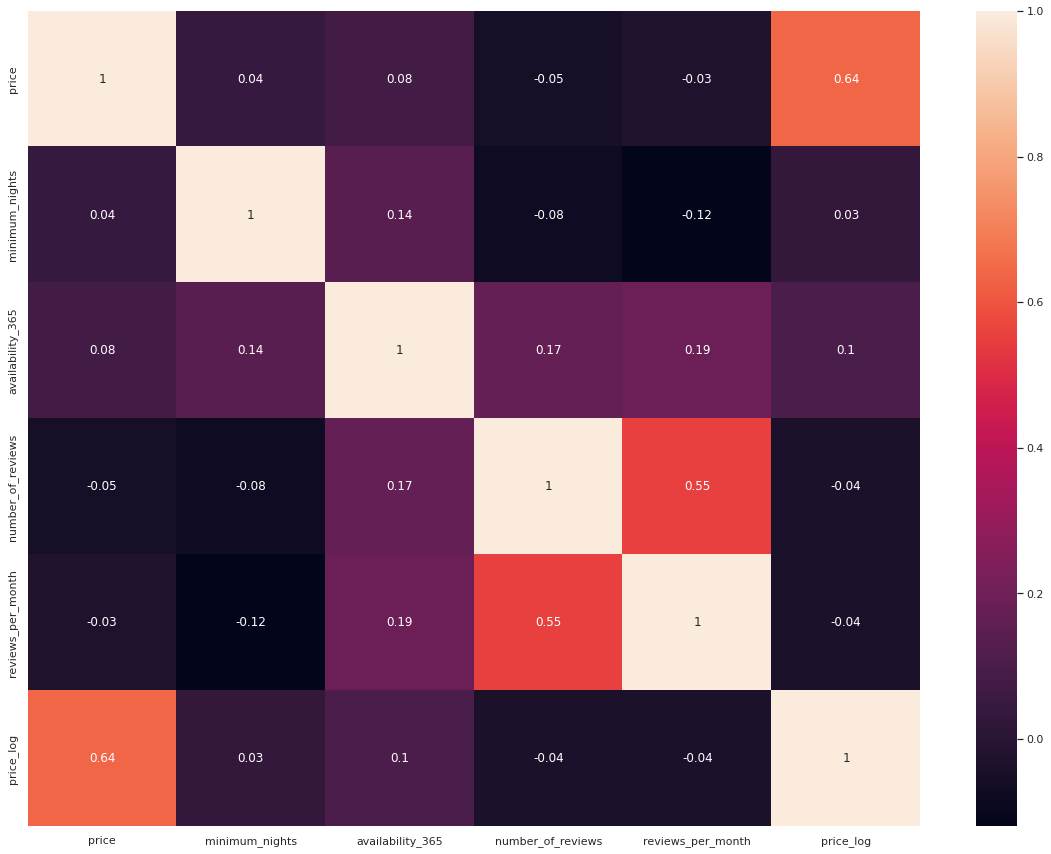

In [ ]:
plt.figure(figsize=(20,15))
correlation_matrix = data[["price","minimum_nights","availability_365","number_of_reviews","reviews_per_month",'price_log']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)

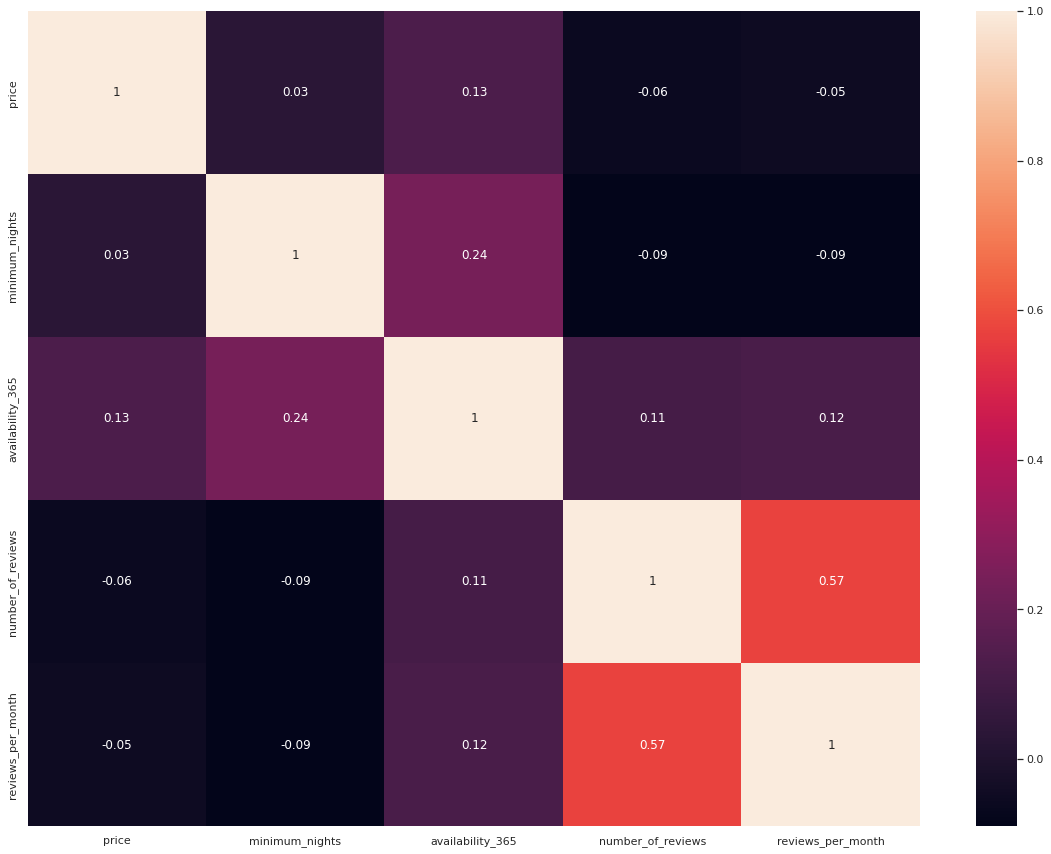

In [ ]:
data_samp = data.sample(600)
plt.figure(figsize=(20,15))
correlation_matrix = data_samp[["price","minimum_nights","availability_365","number_of_reviews","reviews_per_month"]].corr().round(2)
sns.heatmap(data=correlation_matrix , annot=True)

In [ ]:
data_chance = data.sample(100)
stats.spearmanr(data_chance.availability_365 , data_chance.number_of_reviews)

SpearmanrResult(correlation=0.17598830214105868, pvalue=0.07986767047850471)

In [ ]:
stats.pearsonr(data_chance.availability_365 , data_chance.number_of_reviews)

(0.21248293470781426, 0.033802909525554856)

In [ ]:
data_temp = data.sample(400)

# **Availibiliy**

In [ ]:
data[['neighbourhood_group' , "availability_365"]].groupby("neighbourhood_group").describe()

availability_365              ...               
                               count        mean  ...     75%    max
neighbourhood_group                               ...               
Bronx                         1090.0  165.794495  ...  313.75  365.0
Brooklyn                     20095.0  100.217318  ...  188.00  365.0
Manhattan                    21660.0  111.984580  ...  230.00  365.0
Queens                        5666.0  144.451818  ...  286.00  365.0
Staten Island                  373.0  199.678284  ...  333.00  365.0

[5 rows x 8 columns]

In [ ]:
data_busyiest[['neighbourhood_group','price']].groupby("neighbourhood_group").describe()

price                          ...                       
                      count        mean         std  ...    50%    75%      max
neighbourhood_group                                  ...                       
Bronx                 177.0   79.694915   67.928502  ...   65.0   85.0    680.0
Brooklyn             7842.0  111.174445  182.724807  ...   84.0  130.0  10000.0
Manhattan            8101.0  167.900383  221.049807  ...  130.0  199.0   9999.0
Queens               1368.0   97.908626  280.447591  ...   75.0  105.0  10000.0
Staten Island          42.0  119.404762  123.391912  ...   76.0  150.0    700.0

[5 rows x 8 columns]

In [ ]:
temp = data_busyiest.neighbourhood_group == 'Bronx'
data_bronx = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Brooklyn'
data_Brooklyn = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Manhattan'
data_Manhattan = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Queens'
data_Queens = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Staten Island'
data_Staten_Island = data_busyiest[temp]

## **bronx**

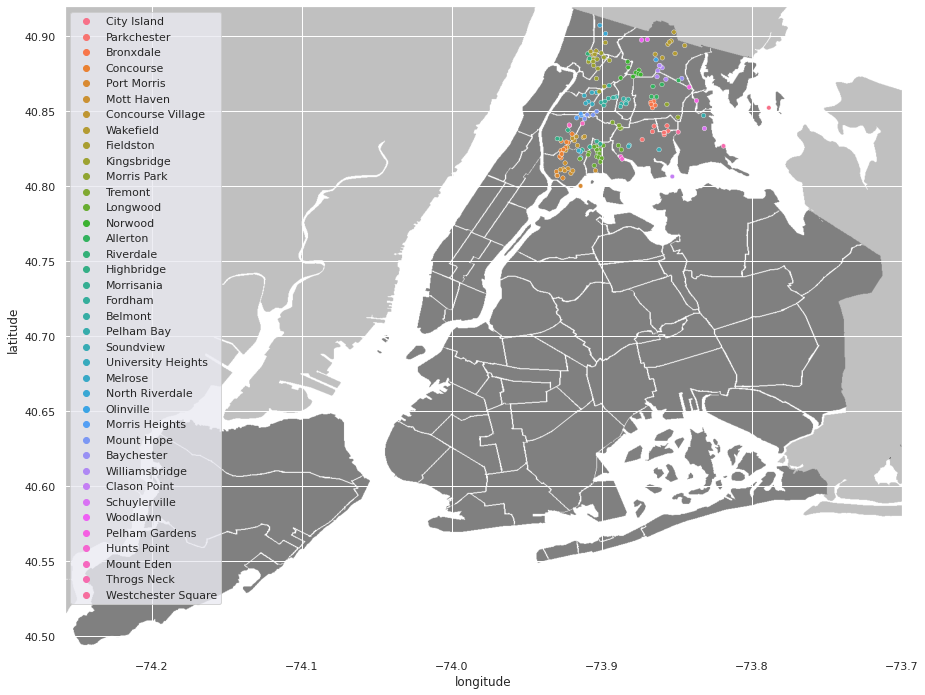

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_bronx['longitude'], y=data_bronx['latitude'], hue='neighbourhood',s=20, data=data_bronx)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Bronx'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                          ...                       
                   count        mean         std  ...    50%     75%     max
neighbourhood                                     ...                       
Allerton            42.0   87.595238   73.048617  ...   66.5  104.75   450.0
Baychester           7.0   75.428571   17.415100  ...   75.0   85.00   101.0
Belmont             24.0   77.125000   68.949454  ...   52.5   99.25   299.0
Bronxdale           19.0   57.105263   20.283805  ...   50.0   75.50   100.0
Castle Hill          9.0   63.000000   33.462666  ...   39.0   86.00   128.0
City Island         18.0  173.000000  240.211916  ...   97.5  117.50  1000.0
Claremont Village   28.0   87.464286   70.065833  ...   68.5  113.00   390.0
Clason Point        21.0  112.761905  101.554372  ...   80.0  110.00   379.0
Co-op City           2.0   77.500000    3.535534  ...   77.5   78.75    80.0
Concourse           50.0   86.180000   48.869543  ...   81.0  104.25   250.0
Concourse Village   32.0   73.781250   33.735914  ...   65.0   85.50   159.0
East Morrisania      9.0   94.444444   46.800404  ...   75.0  120.00   200.0
Eastchester         13.0  141.692308  127.040272  ...   75.0  155.00   475.0
Edenwald            13.0   82.000000   28.618176  ...   75.0   90.00   149.0
Fieldston           12.0   75.083333   26.643977  ...   67.0   87.50   135.0
Fordham             63.0   69.444444   41.288434  ...   60.0   79.00   223.0
Highbridge          27.0   71.111111   41.050938  ...   70.0   80.00   240.0
Hunts Point         18.0   50.500000   27.181849  ...   40.0   55.50   150.0
Kingsbridge         70.0   77.928571   51.458812  ...   70.0   90.00   399.0
Longwood            62.0   91.919355   88.884212  ...   75.0  100.00   680.0
Melrose             10.0   83.300000   34.871351  ...   74.5   99.75   150.0
Morris Heights      17.0   76.941176   58.267133  ...   51.0   80.00   240.0
Morris Park         15.0   69.333333   41.880215  ...   60.0   80.00   190.0
Morrisania          18.0   83.444444   51.121795  ...   73.5   80.00   225.0
Mott Haven          60.0   88.916667   62.837507  ...   74.0  115.00   500.0
Mount Eden           6.0   58.500000   46.194155  ...   45.5   53.25   150.0
Mount Hope          20.0   77.500000   52.661281  ...   60.0  105.00   250.0
North Riverdale     10.0   79.900000   41.511578  ...   65.0  115.50   150.0
Norwood             31.0   75.548387   48.922278  ...   58.0   83.50   200.0
Olinville            4.0   64.000000   48.104054  ...   53.0   91.25   125.0
Parkchester         39.0   69.076923   51.670711  ...   55.0   75.00   300.0
Pelham Bay          17.0  105.000000   64.418553  ...   89.0  125.00   299.0
Pelham Gardens      28.0   93.607143   90.481158  ...   75.0   90.00   450.0
Port Morris         46.0   79.891304   51.078253  ...   62.5  115.00   220.0
Riverdale           11.0  442.090909  724.395535  ...  150.0  425.00  2500.0
Schuylerville       13.0   69.230769   32.746893  ...   65.0   85.00   150.0
Soundview           15.0   53.466667   19.115688  ...   49.0   55.00   103.0
Spuyten Duyvil       4.0  154.750000  139.105176  ...   99.5  180.00   360.0
Throgs Neck         24.0   91.041667   59.544999  ...   74.5   99.25   325.0
Tremont             11.0   51.545455   34.468431  ...   41.0   47.50   150.0
Unionport            7.0  137.142857  138.680002  ...   90.0  100.00   450.0
University Heights  21.0   69.571429   39.164488  ...   55.0   80.00   175.0
Van Nest            11.0  113.818182  133.275518  ...   50.0  128.50   425.0
Wakefield           50.0   85.580000   71.554486  ...   60.0   87.25   309.0
West Farms           2.0  122.000000   60.811183  ...  122.0  143.50   165.0
Westchester Square  10.0  122.200000  193.029531  ...   67.5   74.25   670.0
Williamsbridge      40.0   96.750000   94.269594  ...   64.0   89.00   500.0
Woodlawn            11.0   60.090909   19.821476  ...   68.0   73.50    85.0

[48 rows x 8 columns]

In [ ]:
data_bronx[['neighbourhood','price']].groupby("neighbourhood").describe()

price                          ...                      
                   count        mean         std  ...    50%     75%    max
neighbourhood                                     ...                      
Allerton             5.0   57.200000   15.546704  ...   63.0   70.00   70.0
Baychester           1.0   60.000000         NaN  ...   60.0   60.00   60.0
Belmont              7.0   56.000000   36.665151  ...   30.0   84.50  110.0
Bronxdale            6.0   61.833333   24.943269  ...   75.5   79.00   80.0
City Island          1.0   84.000000         NaN  ...   84.0   84.00   84.0
Clason Point         1.0  350.000000         NaN  ...  350.0  350.00  350.0
Concourse           11.0   97.000000   46.649759  ...   95.0  125.00  175.0
Concourse Village    8.0   73.000000   37.439475  ...   67.5   90.25  145.0
Fieldston            5.0   71.600000   18.702941  ...   70.0   85.00   95.0
Fordham              7.0   49.142857   18.586990  ...   59.0   65.00   65.0
Highbridge           3.0   81.333333   29.670412  ...   70.0   92.50  115.0
Hunts Point          2.0   97.500000   74.246212  ...   97.5  123.75  150.0
Kingsbridge         12.0   69.333333   42.499911  ...   70.0   81.25  175.0
Longwood            18.0  114.166667  144.500865  ...   82.5   99.75  680.0
Melrose              3.0   50.000000    8.544004  ...   49.0   54.00   59.0
Morris Heights       3.0   83.000000   64.552304  ...   80.0  114.50  149.0
Morris Park          2.0   44.500000    7.778175  ...   44.5   47.25   50.0
Morrisania           4.0  122.500000   81.291656  ...  107.5  168.75  225.0
Mott Haven           8.0   74.625000   22.506745  ...   76.0   80.25  120.0
Mount Eden           3.0   74.333333   66.530695  ...   48.0   99.00  150.0
Mount Hope           4.0   46.000000   15.405627  ...   50.0   52.50   60.0
North Riverdale      2.0   98.000000   29.698485  ...   98.0  108.50  119.0
Norwood              9.0   79.666667   54.304696  ...   65.0   87.00  200.0
Olinville            1.0  125.000000         NaN  ...  125.0  125.00  125.0
Parkchester          8.0  107.375000   91.702839  ...   65.0  108.75  300.0
Pelham Bay           1.0   37.000000         NaN  ...   37.0   37.00   37.0
Pelham Gardens       2.0  167.500000  187.383297  ...  167.5  233.75  300.0
Port Morris          5.0   89.400000   70.928133  ...   50.0  120.00  200.0
Riverdale            3.0  108.333333   58.594653  ...   85.0  130.00  175.0
Schuylerville        1.0   85.000000         NaN  ...   85.0   85.00   85.0
Soundview            3.0   48.333333    2.886751  ...   50.0   50.00   50.0
Throgs Neck          1.0   40.000000         NaN  ...   40.0   40.00   40.0
Tremont              4.0   44.500000   16.441817  ...   40.0   48.50   68.0
University Heights   6.0   70.000000   27.748874  ...   62.5   76.25  120.0
Wakefield            8.0   51.875000   16.190275  ...   51.0   57.50   80.0
Westchester Square   1.0   52.000000         NaN  ...   52.0   52.00   52.0
Williamsbridge       6.0   67.666667   41.190614  ...   52.5   75.00  145.0
Woodlawn             2.0   60.000000   14.142136  ...   60.0   65.00   70.0

[38 rows x 8 columns]

## **Brooklyn**

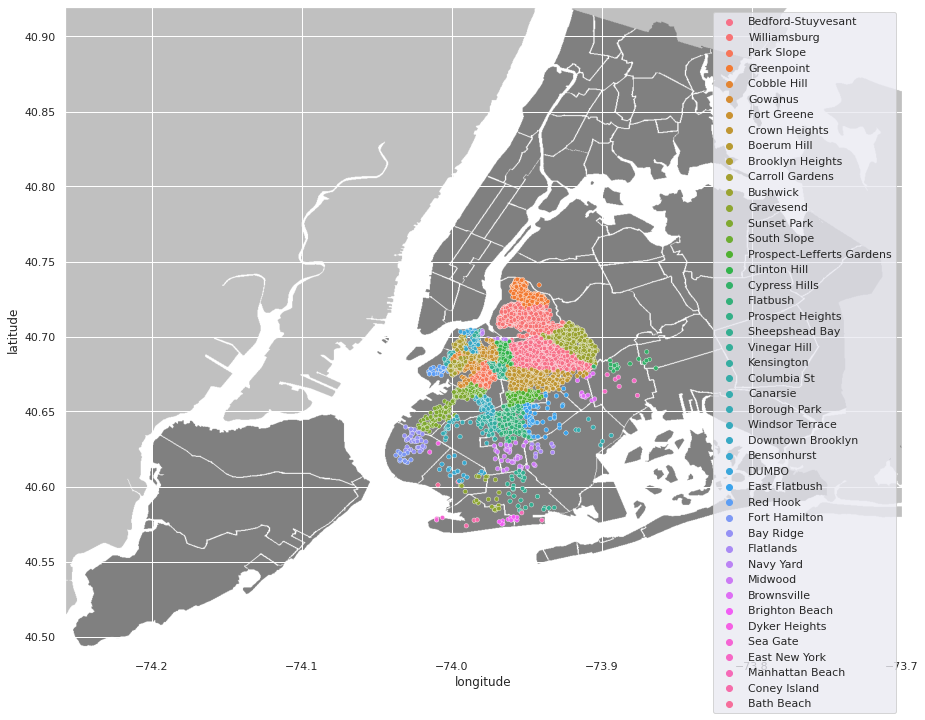

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Brooklyn['longitude'], y=data_Brooklyn['latitude'], hue='neighbourhood',s=20, data=data_Brooklyn)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Brooklyn'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price              ...                 
                            count        mean  ...     75%      max
neighbourhood                                  ...                 
Bath Beach                   17.0   81.764706  ...   99.00    180.0
Bay Ridge                   141.0  144.432624  ...  125.00   4200.0
Bedford-Stuyvesant         3710.0  107.794340  ...  125.00   5000.0
Bensonhurst                  75.0   75.786667  ...   99.50    200.0
Bergen Beach                 10.0  106.700000  ...  111.25    235.0
Boerum Hill                 177.0  176.135593  ...  200.00   1000.0
Borough Park                136.0   63.066176  ...   69.00    300.0
Brighton Beach               75.0  131.933333  ...  114.50   3000.0
Brooklyn Heights            154.0  209.064935  ...  200.00   1500.0
Brownsville                  61.0   76.459016  ...   90.00    300.0
Bushwick                   2462.0   84.903737  ...   99.00   2000.0
Canarsie                    147.0  104.367347  ...  120.00    600.0
Carroll Gardens             233.0  175.914163  ...  199.00   1395.0
Clinton Hill                572.0  181.893357  ...  175.00   8000.0
Cobble Hill                  99.0  211.929293  ...  205.00   1750.0
Columbia St                  42.0  162.952381  ...  167.25   1080.0
Coney Island                 17.0  123.705882  ...  115.00    450.0
Crown Heights              1564.0  112.480179  ...  129.25   2500.0
Cypress Hills               135.0  128.903704  ...  100.00   5000.0
DUMBO                        36.0  196.305556  ...  250.00    400.0
Downtown Brooklyn            83.0  150.349398  ...  180.00    650.0
Dyker Heights                12.0   93.416667  ...  150.00    170.0
East Flatbush               500.0  104.222000  ...  103.25   7500.0
East New York               218.0   85.426606  ...  100.00    300.0
Flatbush                    621.0   92.212560  ...  100.00   1100.0
Flatlands                    83.0  126.433735  ...  129.50   1700.0
Fort Greene                 489.0  151.374233  ...  178.00   1200.0
Fort Hamilton                55.0   93.818182  ...  120.50    200.0
Gowanus                     247.0  158.801619  ...  180.00   1333.0
Gravesend                    68.0   79.014706  ...  100.00    300.0
Greenpoint                 1114.0  144.952424  ...  170.00  10000.0
Kensington                  175.0   92.885714  ...  100.00    525.0
Manhattan Beach               8.0  103.500000  ...  133.75    150.0
Midwood                     109.0   80.339450  ...  100.00    250.0
Mill Basin                    4.0  179.750000  ...  262.25    299.0
Navy Yard                    14.0  151.642857  ...  151.50    295.0
Park Slope                  506.0  176.312253  ...  200.00   2626.0
Prospect Heights            357.0  173.372549  ...  175.00   4000.0
Prospect-Lefferts Gardens   535.0  110.401869  ...  120.00   2545.0
Red Hook                     79.0  143.455696  ...  150.00    750.0
Sea Gate                      7.0  487.857143  ...  769.00   1485.0
Sheepshead Bay              164.0  105.774390  ...  110.00   2000.0
South Slope                 284.0  146.725352  ...  180.00    500.0
Sunset Park                 390.0  113.041026  ...  126.50   2000.0
Vinegar Hill                 34.0  187.176471  ...  243.75    550.0
Williamsburg               3919.0  143.839500  ...  177.50   4500.0
Windsor Terrace             157.0  138.993631  ...  160.00    450.0

[47 rows x 8 columns]

In [ ]:
data_Brooklyn[['neighbourhood','price']].groupby("neighbourhood").describe()

price              ...                 
                            count        mean  ...     75%      max
neighbourhood                                  ...                 
Bath Beach                    2.0  122.500000  ...  136.25    150.0
Bay Ridge                    35.0   67.085714  ...   92.50    135.0
Bedford-Stuyvesant         1232.0   92.587662  ...  100.00   5000.0
Bensonhurst                  20.0   62.500000  ...   72.50    125.0
Boerum Hill                  78.0  145.051282  ...  170.00   1000.0
Borough Park                 24.0   52.416667  ...   62.50    103.0
Brighton Beach               11.0   96.818182  ...   99.00    199.0
Brooklyn Heights             71.0  175.112676  ...  200.00   1500.0
Brownsville                  13.0   55.461538  ...   60.00    115.0
Bushwick                   1015.0   75.629557  ...   85.00   2000.0
Canarsie                      7.0   86.857143  ...   80.00    250.0
Carroll Gardens             111.0  163.144144  ...  199.50    800.0
Clinton Hill                250.0  150.476000  ...  149.75   6500.0
Cobble Hill                  41.0  169.170732  ...  175.00   1000.0
Columbia St                  16.0  125.000000  ...  145.25    250.0
Coney Island                  3.0   58.333333  ...   75.00    100.0
Crown Heights               652.0   90.371166  ...  101.25    974.0
Cypress Hills                18.0  331.166667  ...   75.00   5000.0
DUMBO                        16.0  171.437500  ...  211.25    350.0
Downtown Brooklyn            45.0  131.088889  ...  170.00    250.0
Dyker Heights                 2.0   72.000000  ...   73.50     75.0
East Flatbush                67.0   93.208955  ...  107.50    650.0
East New York                 7.0   75.428571  ...   90.50    120.0
Flatbush                    254.0   84.082677  ...   92.00    800.0
Flatlands                     9.0   98.000000  ...   95.00    250.0
Fort Greene                 202.0  141.495050  ...  168.75   1200.0
Fort Hamilton                13.0   93.230769  ...  120.00    179.0
Gowanus                      95.0  129.905263  ...  156.50    414.0
Gravesend                    22.0   62.681818  ...   69.00    300.0
Greenpoint                  529.0  135.172023  ...  150.00  10000.0
Kensington                   73.0   84.438356  ...  100.00    225.0
Manhattan Beach               2.0  114.500000  ...  132.25    150.0
Midwood                      40.0   68.500000  ...   80.00    150.0
Navy Yard                     8.0  155.750000  ...  166.25    295.0
Park Slope                  217.0  146.668203  ...  179.00    935.0
Prospect Heights            168.0  134.005952  ...  150.00   1494.0
Prospect-Lefferts Gardens   210.0   91.738095  ...  109.50    400.0
Red Hook                     26.0  137.000000  ...  150.00    500.0
Sea Gate                      4.0  426.500000  ...  496.00   1315.0
Sheepshead Bay               32.0   83.843750  ...  106.00    200.0
South Slope                 116.0  141.603448  ...  175.00    400.0
Sunset Park                 141.0  103.943262  ...  100.00   2000.0
Vinegar Hill                 13.0  190.384615  ...  245.00    375.0
Williamsburg               1868.0  124.809957  ...  150.00   1763.0
Windsor Terrace              64.0  134.046875  ...  150.00    400.0

[45 rows x 8 columns]

## **Manhattan**

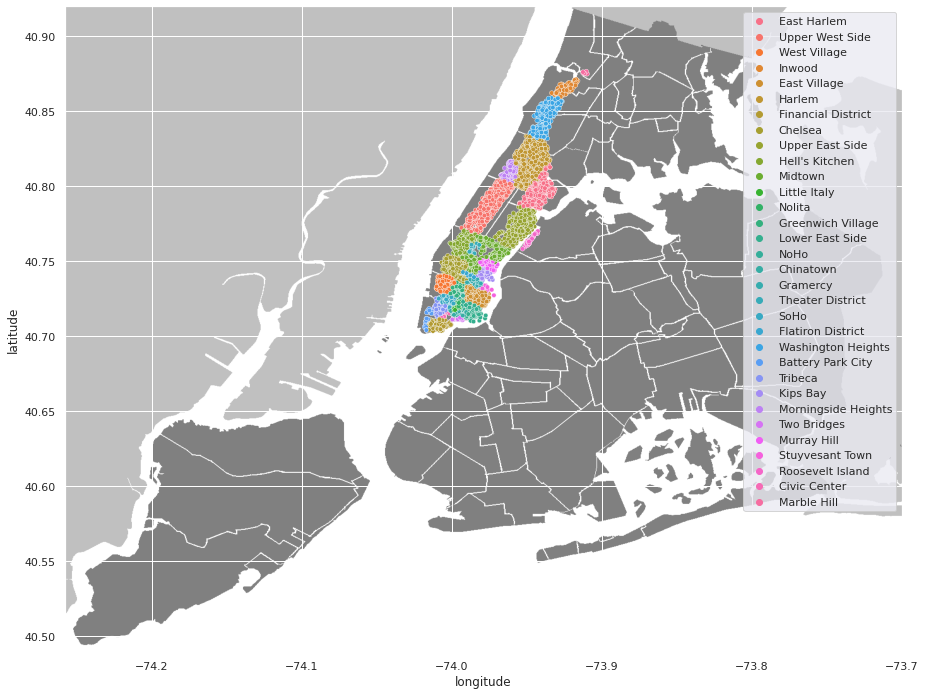

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Manhattan['longitude'], y=data_Manhattan['latitude'], hue='neighbourhood',s=20, data=data_Manhattan)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Manhattan'
data_temp = data[temp]
data_temp[['neighbourhood','availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                               count        mean  ...     75%    max
neighbourhood                                     ...               
Battery Park City               70.0  100.328571  ...  212.50  365.0
Chelsea                       1113.0  113.995508  ...  245.00  365.0
Chinatown                      368.0   90.796196  ...  172.75  365.0
Civic Center                    52.0   68.269231  ...   89.00  365.0
East Harlem                   1117.0   98.973142  ...  180.00  365.0
East Village                  1853.0   74.623853  ...  123.00  365.0
Financial District             744.0  191.536290  ...  331.25  365.0
Flatiron District               80.0  123.050000  ...  287.00  365.0
Gramercy                       338.0   94.526627  ...  182.00  365.0
Greenwich Village              392.0   82.051020  ...  157.00  365.0
Harlem                        2658.0  106.577502  ...  202.75  365.0
Hell's Kitchen                1958.0  138.846782  ...  270.00  365.0
Inwood                         252.0   98.547619  ...  179.25  365.0
Kips Bay                       470.0  121.717021  ...  265.75  365.0
Little Italy                   121.0  100.338843  ...  179.00  362.0
Lower East Side                911.0   97.165752  ...  188.00  365.0
Marble Hill                     12.0  114.666667  ...  255.50  349.0
Midtown                       1545.0  157.703560  ...  311.00  365.0
Morningside Heights            346.0   43.054913  ...   26.50  365.0
Murray Hill                    484.0  173.679752  ...  335.25  365.0
NoHo                            78.0  101.820513  ...  179.00  364.0
Nolita                         253.0   69.810277  ...  110.00  365.0
Roosevelt Island                77.0   72.584416  ...   88.00  362.0
SoHo                           358.0  110.357542  ...  206.00  365.0
Stuyvesant Town                 37.0   65.108108  ...   90.00  365.0
Theater District               288.0  201.871528  ...  333.00  365.0
Tribeca                        177.0  126.508475  ...  280.00  365.0
Two Bridges                     72.0   86.236111  ...  149.25  359.0
Upper East Side               1798.0  112.798109  ...  241.75  365.0
Upper West Side               1971.0   96.583460  ...  197.00  365.0
Washington Heights             899.0   98.932147  ...  181.50  365.0
West Village                   768.0   85.459635  ...  157.25  365.0

[32 rows x 8 columns]

In [ ]:
data_Manhattan[['neighbourhood','availability_365']].groupby("neighbourhood").describe()

availability_365                                   
                               count mean  std  min  25%  50%  75%  max
neighbourhood                                                          
Battery Park City               36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chelsea                        407.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chinatown                      142.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Civic Center                    25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
East Harlem                    381.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
East Village                   896.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Financial District             172.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Flatiron District               31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Gramercy                       142.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Greenwich Village              185.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Harlem                         924.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Hell's Kitchen                 512.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Inwood                          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kips Bay                       192.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Little Italy                    41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Lower East Side                381.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Marble Hill                      6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Midtown                        458.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Morningside Heights            218.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Murray Hill                    118.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NoHo                            25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Nolita                         122.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Roosevelt Island                42.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
SoHo                           114.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Stuyvesant Town                 19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Theater District                49.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Tribeca                         56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Two Bridges                     25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Upper East Side                703.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Upper West Side                882.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Washington Heights             351.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
West Village                   350.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## **Queens**

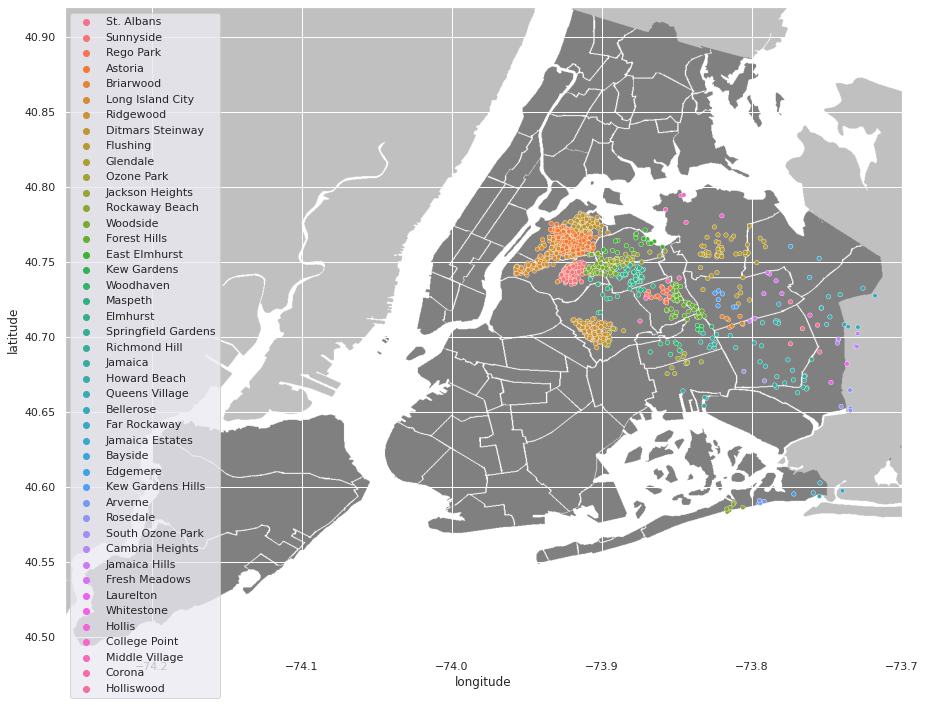

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Queens['longitude'], y=data_Queens['latitude'], hue='neighbourhood',s=20, data=data_Queens)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Queens'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                          ...                        
                     count        mean         std  ...    50%     75%      max
neighbourhood                                       ...                        
Arverne               77.0  171.779221  193.347902  ...  125.0  200.00   1500.0
Astoria              900.0  117.187778  349.898287  ...   85.0  120.00  10000.0
Bay Terrace            6.0  142.000000   82.561492  ...  141.5  187.75    258.0
Bayside               39.0  157.948718  407.561616  ...   65.0  117.50   2600.0
Bayswater             17.0   87.470588   48.279289  ...   70.0  105.00    230.0
Belle Harbor           8.0  171.500000   90.700449  ...  155.0  206.25    350.0
Bellerose             14.0   99.357143   55.614894  ...   85.0  103.75    240.0
Breezy Point           3.0  213.333333   31.754265  ...  195.0  222.50    250.0
Briarwood             56.0  105.875000  136.026343  ...   71.5   99.25   1000.0
Cambria Heights       26.0   81.730769   54.411438  ...   60.0   95.00    250.0
College Point         19.0   88.000000   80.284217  ...   60.0   83.50    400.0
Corona                64.0   59.171875   49.300682  ...   40.0   69.25    359.0
Ditmars Steinway     309.0   95.029126   64.916198  ...   79.0  107.00    600.0
Douglaston             8.0   82.750000   48.446583  ...   65.0  105.50    178.0
East Elmhurst        185.0   81.183784   66.102101  ...   60.0   99.00    700.0
Edgemere              11.0   94.727273   64.957049  ...   65.0  139.50    200.0
Elmhurst             237.0   80.459916   62.422456  ...   59.0   90.00    443.0
Far Rockaway          29.0  165.862069  229.294527  ...   63.0  147.00    900.0
Flushing             426.0   93.514085  111.432390  ...   65.0   98.00   1500.0
Forest Hills         144.0  121.625000  211.029308  ...   80.0  116.00   2350.0
Fresh Meadows         32.0   99.500000   79.965315  ...   72.0   96.25    375.0
Glendale              54.0   90.796296   56.840850  ...   84.0  122.50    299.0
Hollis                14.0   88.642857   38.509953  ...   77.5  100.00    175.0
Holliswood             4.0  135.750000   71.355331  ...  112.5  153.50    239.0
Howard Beach          20.0  115.400000   65.130153  ...  100.0  153.75    250.0
Jackson Heights      186.0   80.897849   46.373167  ...   68.5  100.00    260.0
Jamaica              231.0   95.770563   89.816742  ...   70.0  125.00   1000.0
Jamaica Estates       19.0  182.947368  170.311634  ...  135.0  250.00    750.0
Jamaica Hills          8.0  132.125000  106.323546  ...   83.5  151.25    325.0
Kew Gardens           32.0   88.375000   51.306008  ...   67.5  100.00    219.0
Kew Gardens Hills     26.0  112.307692   78.934286  ...   92.5  146.50    399.0
Laurelton             18.0   95.333333   65.996435  ...   75.0  121.25    254.0
Little Neck            5.0   75.200000   48.669292  ...   50.0  100.00    149.0
Long Island City     537.0  127.465549  124.617427  ...   99.0  150.00   2000.0
Maspeth              110.0   83.645455   47.155139  ...   65.0  100.00    245.0
Middle Village        31.0  109.580645   59.473677  ...   99.0  119.50    265.0
Neponsit               3.0  274.666667   75.002222  ...  274.0  312.00    350.0
Ozone Park            62.0   85.274194   41.296675  ...   75.0  107.50    200.0
Queens Village        60.0   83.933333   48.851510  ...   75.0   99.25    320.0
Rego Park            106.0   83.877358   60.489700  ...   67.0   98.00    300.0
Richmond Hill         94.0   87.117021   58.941899  ...   65.0  100.00    300.0
Ridgewood            423.0   77.184397   51.276816  ...   60.0   90.00    375.0
Rockaway Beach        56.0  132.178571   79.086169  ...  125.0  150.00    545.0
Rosedale              59.0   76.694915   54.442077  ...   65.0   80.00    350.0
South Ozone Park      40.0   82.400000   67.970506  ...   69.0   86.00    400.0
Springfield Gardens   85.0   94.235294   49.908403  ...   80.0  101.00    300.0
St. Albans            76.0  100.828947   97.416137  ...   61.5  101.25    600.0
Sunnyside            

In [ ]:
data_Queens[['neighbourhood','price']].groupby("neighbourhood").describe()

price                          ...                        
                     count        mean         std  ...    50%     75%      max
neighbourhood                                       ...                        
Arverne                4.0  111.250000   60.052061  ...  105.0  156.25    175.0
Astoria              352.0  127.636364  539.702570  ...   87.0  112.75  10000.0
Bayside                3.0   97.000000   81.098705  ...   60.0  125.00    190.0
Bellerose              2.0   68.500000   37.476659  ...   68.5   81.75     95.0
Briarwood              8.0   61.000000   15.748016  ...   60.0   71.25     85.0
Cambria Heights        6.0   77.833333   43.915449  ...   73.5  115.00    130.0
College Point          4.0   73.750000   34.490337  ...   65.0   90.00    120.0
Corona                 2.0   73.000000   38.183766  ...   73.0   86.50    100.0
Ditmars Steinway      99.0   91.818182   71.885732  ...   75.0  100.00    600.0
East Elmhurst         22.0   82.454545   50.315885  ...   64.5  100.00    220.0
Edgemere               1.0  195.000000         NaN  ...  195.0  195.00    195.0
Elmhurst              58.0   71.706897   45.906468  ...   55.0   83.75    229.0
Far Rockaway           4.0  159.000000  195.960880  ...   75.5  187.50    450.0
Flushing              57.0  100.859649  141.519993  ...   63.0   95.00   1000.0
Forest Hills          45.0   96.933333   64.506659  ...   75.0  100.00    300.0
Fresh Meadows          5.0  105.000000  102.164084  ...   75.0   80.00    285.0
Glendale              12.0   99.250000   41.831100  ...   97.5  107.50    195.0
Hollis                 1.0  100.000000         NaN  ...  100.0  100.00    100.0
Holliswood             1.0  100.000000         NaN  ...  100.0  100.00    100.0
Howard Beach           4.0   73.750000   30.379544  ...   75.0  100.00    100.0
Jackson Heights       36.0   81.111111   39.368427  ...   72.5  100.00    199.0
Jamaica               20.0   65.700000   25.843863  ...   59.5   72.00    125.0
Jamaica Estates        1.0  750.000000         NaN  ...  750.0  750.00    750.0
Jamaica Hills          2.0   57.500000   10.606602  ...   57.5   61.25     65.0
Kew Gardens            6.0  101.666667   53.820690  ...  100.0  100.00    200.0
Kew Gardens Hills      7.0   79.857143   55.061870  ...   50.0  112.00    160.0
Laurelton              2.0   51.000000   19.798990  ...   51.0   58.00     65.0
Long Island City     180.0  108.588889   50.560522  ...  100.0  150.00    275.0
Maspeth               12.0   66.000000   24.885191  ...   66.5   75.00    125.0
Middle Village         2.0   82.500000   24.748737  ...   82.5   91.25    100.0
Ozone Park            11.0   68.000000   54.514218  ...   45.0   84.50    200.0
Queens Village         9.0   67.111111   43.414987  ...   55.0   70.00    175.0
Rego Park             21.0   52.904762   25.808729  ...   48.0   65.00    135.0
Richmond Hill         11.0   72.636364   31.693131  ...   60.0   85.00    150.0
Ridgewood            146.0   70.479452   42.085335  ...   60.0   80.00    275.0
Rockaway Beach         7.0  103.571429   29.102446  ...   88.0  130.00    140.0
Rosedale               5.0   69.800000   36.717843  ...   70.0   70.00    125.0
South Ozone Park       2.0   52.000000   32.526912  ...   52.0   63.50     75.0
Springfield Gardens    6.0   92.833333   69.536801  ...   65.0   95.00    228.0
St. Albans             4.0   61.250000   12.500000  ...   62.5   67.50     75.0
Sunnyside            118.0   89.279661   62.721728  ...   78.5  100.00    600.0
Whitestone             1.0   40.000000         NaN  ...   40.0   40.00     40.0
Woodhaven              9.0   72.666667   56.409219  ...   50.0   63.00    170.0
Woodside              60.0   81.533333   94.598073  ...   50.0   90.00    500.0

[44 rows x 8 columns]

## **Statten Islands**

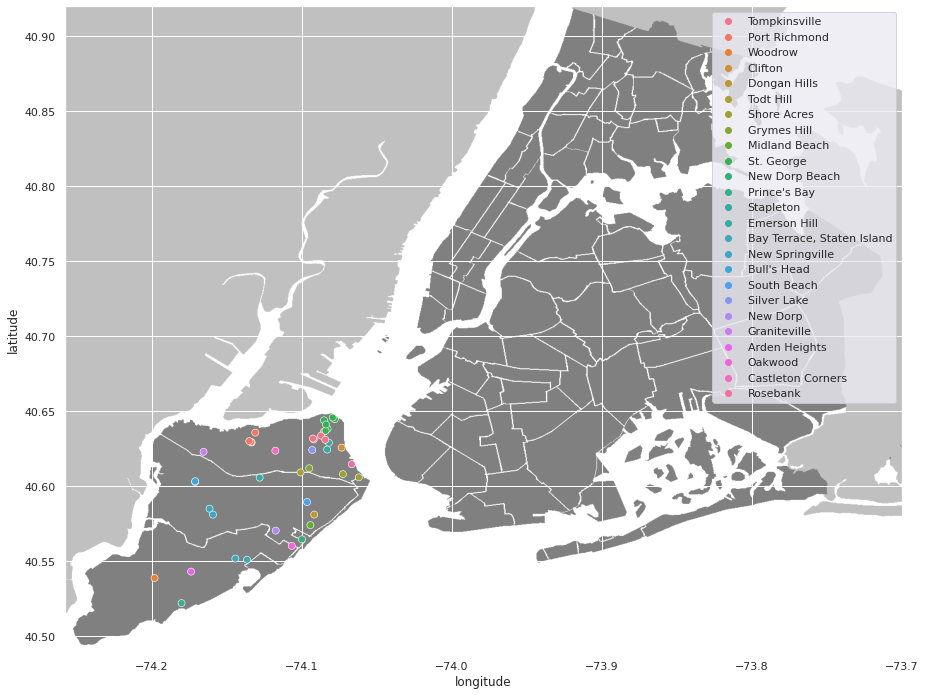

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Staten_Island['longitude'], y=data_Staten_Island['latitude'], hue='neighbourhood',s=50, data=data_Staten_Island)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Staten Island'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price              ...                
                           count        mean  ...     75%     max
neighbourhood                                 ...                
Arden Heights                4.0   67.250000  ...   77.00    83.0
Arrochar                    21.0  115.000000  ...  125.00   625.0
Bay Terrace, Staten Island   2.0  102.500000  ...  126.25   150.0
Bull's Head                  6.0   47.333333  ...   50.00    80.0
Castleton Corners            4.0  139.750000  ...  187.25   299.0
Clifton                     15.0   84.933333  ...   97.50   165.0
Concord                     26.0   58.192308  ...   75.00   200.0
Dongan Hills                 7.0   79.428571  ...   90.00   155.0
Eltingville                  3.0  141.666667  ...  184.50   299.0
Emerson Hill                 5.0   68.200000  ...   80.00    85.0
Fort Wadsworth               1.0  800.000000  ...  800.00   800.0
Graniteville                 3.0   68.666667  ...   93.00   115.0
Grant City                   6.0   57.666667  ...   74.25    80.0
Great Kills                 10.0  100.600000  ...  114.75   235.0
Grymes Hill                  7.0  159.142857  ...  187.50   300.0
Howland Hook                 2.0  100.000000  ...  100.00   100.0
Huguenot                     3.0  118.333333  ...  140.00   180.0
Lighthouse Hill              2.0  157.500000  ...  178.75   200.0
Mariners Harbor              8.0   94.625000  ...  135.00   200.0
Midland Beach                6.0   91.833333  ...  103.75   115.0
New Brighton                 5.0  101.800000  ...  115.00   249.0
New Dorp                     1.0   57.000000  ...   57.00    57.0
New Dorp Beach               5.0   57.400000  ...   62.00   109.0
New Springville              8.0   76.000000  ...   80.75   150.0
Oakwood                      5.0   81.200000  ...  100.00   130.0
Port Richmond                9.0   90.111111  ...   55.00   250.0
Prince's Bay                 4.0  409.500000  ...  451.25  1250.0
Randall Manor               19.0  336.000000  ...  104.50  5000.0
Richmondtown                 1.0   78.000000  ...   78.00    78.0
Rosebank                     7.0  111.857143  ...  136.50   200.0
Rossville                    1.0   75.000000  ...   75.00    75.0
Shore Acres                  7.0  152.714286  ...  232.50   300.0
Silver Lake                  2.0   70.000000  ...   75.00    80.0
South Beach                  8.0   89.250000  ...   99.25   275.0
St. George                  48.0  118.145833  ...  121.25  1000.0
Stapleton                   27.0   98.962963  ...   97.50   450.0
Todt Hill                    4.0  169.000000  ...  208.50   429.0
Tompkinsville               42.0   76.190476  ...   98.00   245.0
Tottenville                  7.0  144.857143  ...  192.50   299.0
West Brighton               18.0   80.555556  ...   87.50   200.0
Westerleigh                  2.0   71.500000  ...   87.25   103.0
Willowbrook                  1.0  249.000000  ...  249.00   249.0
Woodrow                      1.0  700.000000  ...  700.00   700.0

[43 rows x 8 columns]

In [ ]:
data_Staten_Island[['neighbourhood','price']].groupby("neighbourhood").describe()

price                          ...                      
                           count        mean         std  ...    50%     75%    max
neighbourhood                                             ...                      
Arden Heights                1.0   41.000000         NaN  ...   41.0   41.00   41.0
Bay Terrace, Staten Island   2.0  102.500000   67.175144  ...  102.5  126.25  150.0
Bull's Head                  2.0   32.000000    9.899495  ...   32.0   35.50   39.0
Castleton Corners            1.0  150.000000         NaN  ...  150.0  150.00  150.0
Clifton                      1.0   75.000000         NaN  ...   75.0   75.00   75.0
Dongan Hills                 1.0  155.000000         NaN  ...  155.0  155.00  155.0
Emerson Hill                 1.0   85.000000         NaN  ...   85.0   85.00   85.0
Graniteville                 1.0   71.000000         NaN  ...   71.0   71.00   71.0
Grymes Hill                  1.0  200.000000         NaN  ...  200.0  200.00  200.0
Midland Beach                1.0  100.000000         NaN  ...  100.0  100.00  100.0
New Dorp                     1.0   57.000000         NaN  ...   57.0   57.00   57.0
New Dorp Beach               1.0   62.000000         NaN  ...   62.0   62.00   62.0
New Springville              2.0  104.000000   65.053824  ...  104.0  127.00  150.0
Oakwood                      1.0   46.000000         NaN  ...   46.0   46.00   46.0
Port Richmond                4.0  141.750000  108.910896  ...  135.5  228.25  250.0
Prince's Bay                 1.0  185.000000         NaN  ...  185.0  185.00  185.0
Rosebank                     1.0  135.000000         NaN  ...  135.0  135.00  135.0
Shore Acres                  2.0  232.500000   95.459415  ...  232.5  266.25  300.0
Silver Lake                  1.0   60.000000         NaN  ...   60.0   60.00   60.0
South Beach                  1.0   20.000000         NaN  ...   20.0   20.00   20.0
St. George                   6.0   77.833333   41.667333  ...   63.5   94.25  150.0
Stapleton                    2.0   69.000000   28.284271  ...   69.0   79.00   89.0
Todt Hill                    1.0  429.000000         NaN  ...  429.0  429.00  429.0
Tompkinsville                5.0   66.000000   29.231832  ...   50.0   95.00  100.0
Woodrow                      1.0  700.000000         NaN  ...  700.0  700.00  700.0

[25 rows x 8 columns]

## **Test Neighbourhoods**

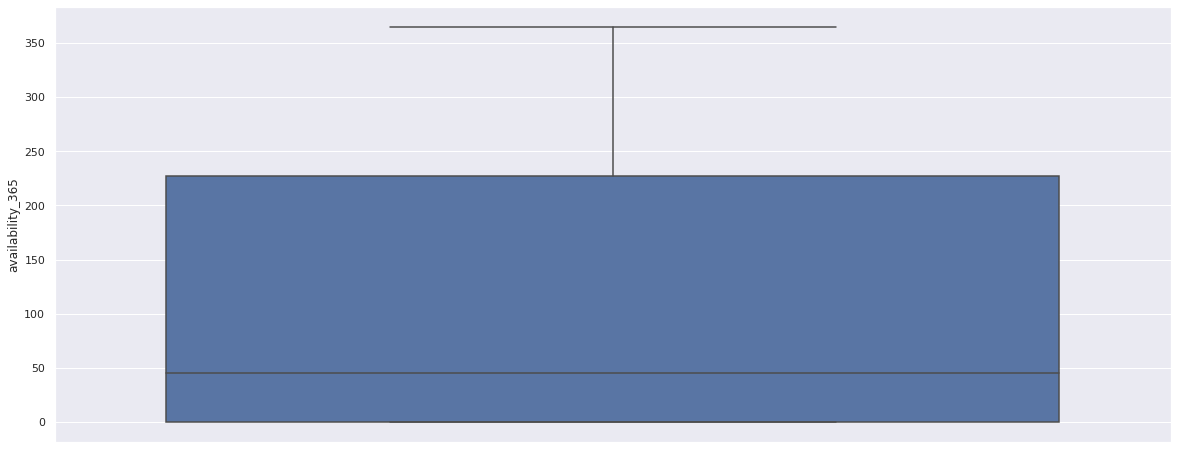

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot(y='availability_365' , data = data)

### **Astoria**

In [ ]:
temp = data.neighbourhood == "Astoria"
data_A = data[temp]
data_A

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
257,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,Astoria,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226,4.595120
316,74680,One Bedroom Mini studio - Free WIFI,265109,Nazleen,Queens,Astoria,40.77635,-73.93426,Entire home/apt,115,2,198,2019-05-31,2.01,1,257,4.744932
348,94035,"Modern, Safe, Clean, Bright Room in Astoria for 2",35375,Savannah,Queens,Astoria,40.75961,-73.91117,Private room,80,1,42,2019-07-06,1.21,2,365,4.382027
385,115748,1 BDRM Apt-Weekend Sublease,585166,Lilly,Queens,Astoria,40.76434,-73.92132,Entire home/apt,110,4,30,2019-06-16,0.32,1,363,4.700480
435,151199,Astoria-Private Home NYC-,722320,Gladys & Bob,Queens,Astoria,40.75725,-73.91098,Entire home/apt,129,1,414,2019-07-03,4.34,1,245,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,36382381,Spacious studio in the heart of downtown Astoria,273570019,Khaled,Queens,Astoria,40.76349,-73.92577,Private room,75,1,0,NaN,NaN,1,359,4.317488
48685,36383565,Spacious Astoria Apartment in a Prime Location!,14258377,Tracy,Queens,Astoria,40.76389,-73.91963,Private room,50,4,0,NaN,NaN,1,38,3.912023
48797,36437317,private room in Astoria,122204600,Mohammed,Queens,Astoria,40.76431,-73.90992,Private room,49,15,0,NaN,NaN,1,341,3.891820
48822,36448708,Entire 3 Bedroom Astoria Apartment,183211776,Rafael,Queens,Astoria,40.76491,-73.90959,Entire home/apt,169,1,0,NaN,NaN,4,28,5.129899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


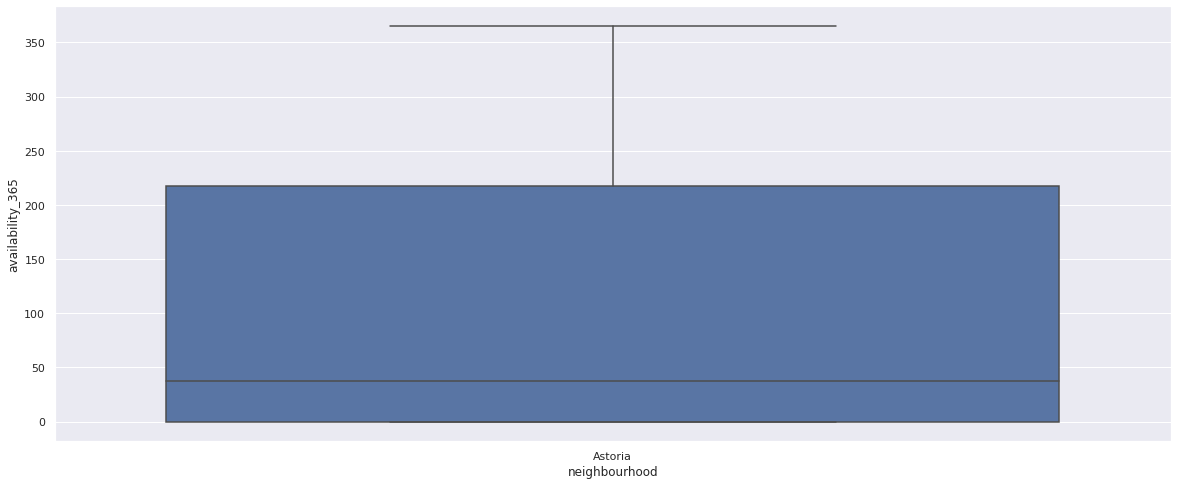

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'availability_365' , data = data_A)

In [ ]:
stats.ttest_ind(data_A.availability_365,data.sample(900).availability_365)

Ttest_indResult(statistic=-0.17002524534243224, pvalue=0.8650094109169397)

### **Financial District**

In [ ]:
temp = data.neighbourhood == "Financial District"
data_C = data[temp]
data_C

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,5.278115
709,261344,Inspired in Historic Downtown NYC!,568103,Liah,Manhattan,Financial District,40.70523,-74.01345,Private room,101,7,51,2019-06-02,0.55,1,307,4.615121
735,267376,BIG ROOM / DOWNTOWN LOFT /,638721,Fred,Manhattan,Financial District,40.70741,-74.00102,Private room,65,30,10,2019-06-24,1.02,1,0,4.174387
979,393094,Designer studio in Luxury Building,1965972,Alayna,Manhattan,Financial District,40.70621,-74.01525,Entire home/apt,225,4,27,2019-05-25,0.31,1,169,5.416100
1018,413876,Finest Gateway to historic Financial District,2059155,Dan,Manhattan,Financial District,40.70537,-74.00992,Entire home/apt,160,1,36,2018-09-26,0.57,1,365,5.075174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48637,36351709,Fidi 1 Bedroom,28983064,Joseph,Manhattan,Financial District,40.70664,-74.01258,Private room,57,30,0,NaN,NaN,1,66,4.043051
48667,36375840,Perfectly Located Studio in FiDi has all you n...,273524881,Shannon,Manhattan,Financial District,40.70787,-74.00780,Entire home/apt,158,7,0,NaN,NaN,1,70,5.062595
48675,36379995,**Bright Luxury Apt in Financial District+Balcony,90870599,Claris,Manhattan,Financial District,40.70822,-74.01418,Entire home/apt,225,4,0,NaN,NaN,1,79,5.416100
48804,36441908,Amazing flex room in financial district with view,112024431,Dariné,Manhattan,Financial District,40.70597,-74.01562,Private room,99,4,0,NaN,NaN,1,22,4.595120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


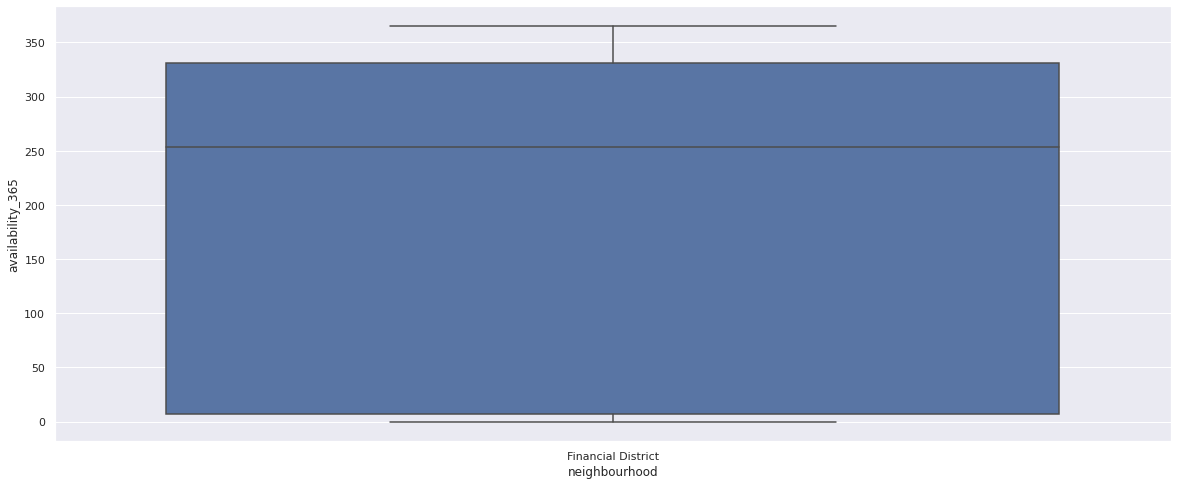

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'availability_365' , data = data_C)

In [ ]:
stats.ttest_rel(data_C.availability_365,data.sample(744).availability_365)

Ttest_relResult(statistic=11.490361768423808, pvalue=3.054002997917719e-28)

In [ ]:
data_C[['availability_365','room_type']].groupby("room_type").describe()

availability_365                          ...                     
                           count        mean         std  ...    50%    75%    max
room_type                                                 ...                     
Entire home/apt            572.0  213.830420  138.362696  ...  281.5  332.0  365.0
Private room               162.0  118.617284  148.583755  ...   17.5  291.5  365.0
Shared room                 10.0   97.600000  129.782040  ...   41.5  156.0  357.0

[3 rows x 8 columns]

In [ ]:
data[['availability_365','room_type']].groupby("room_type").describe()

availability_365                          ...                    
                           count        mean         std  ...   50%    75%    max
room_type                                                 ...                    
Entire home/apt          25407.0  111.926241  129.805917  ...  42.0  229.0  365.0
Private room             22319.0  111.203638  132.102100  ...  45.0  214.0  365.0
Shared room               1158.0  161.873057  151.392854  ...  90.0  341.0  365.0

[3 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


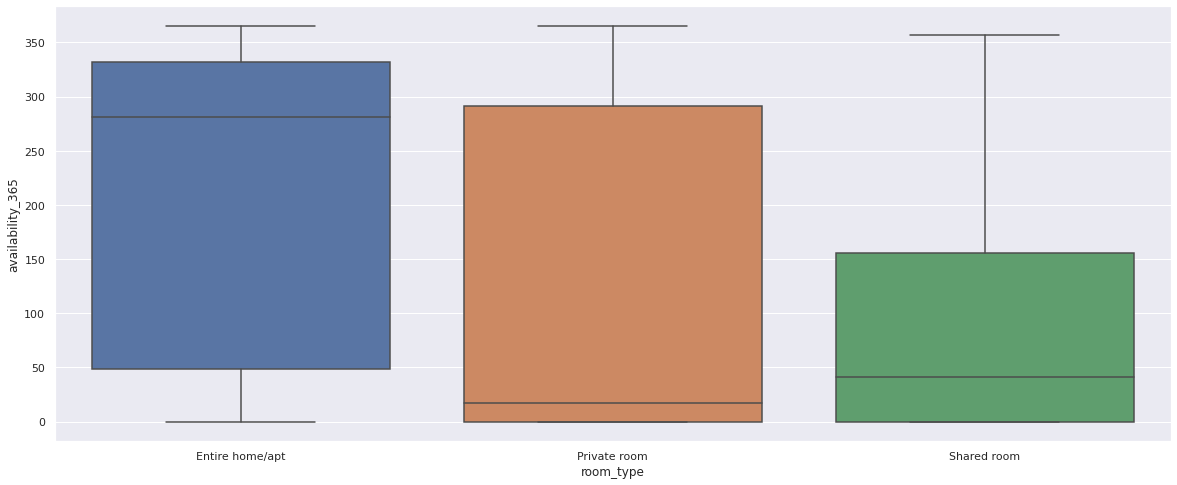

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('room_type' ,'availability_365', data = data_C)